### 17. 오토인코더와 GAN을 사용한 표현 학습과 생성적 학습

#### 17.1.  효율적인 데이터 표현
#### 17.2. 과소완전 선형 오토인코더로  PCA 수행
#### 17.3. 적층 오토인코더
#### 17.4. 합성곱 오토인코더
#### 17.5. 순환 오토인코더
#### 17.6. 잡음 제거 오토인코더
#### 17.7. 희소 오토인코더
#### 17.8. 변이형 오토인코더
#### 17.9. 생성적 적대 신경망(GAN)

* 오토인코더: 레이블되어 있지 않은 훈련 데이터를 사용해서 잠재 표현 또는 코딩이라 부르는 입력 데이터의 밀집 표현을 학습할 수 있는 인공신경망   
    * 보통 코딩은 일반적으로 입력보다 훨씬 낮은 차원을 가지므로 오토인코더가 차원축소, 특히 시각화에 유용하게 사용됨.   
    * 강력한 특성 추출기처럼 작동하기 때문에 심층 신경망의 비지도 사전훈련에 사용될 수도 있음.   
    * 훈련 데이터와 매우 비슷한 새로운 데이터를 생성할 수 있고 이를 생성 모델이라고 함.   
    * 생성된 이미지가 흐릿하고 실제 이미지와는 같지 않음. -> GAN으로 생성하는 것이 믿기힘들 정도로 잘 생성함.   
    
####  <span style="color:green">✅오토인코더와 GAN은 모두 비지도 학습이며, 둘 다 밀집 표현을 학습하고 생성 모델로 사용할 수 있지만 동작 방식은 크게 다름. </span>
* 오토인코더: 단순히 입력을 출력으로 복사하는 방법을 학습, 네트워크에 제약을 가해 작업을 어렵게 만들고 이런 제약은 오토인코더가 단순히 입력을 출력으로 바로 복사하지 못하도록 막고 데이터를 효율적으로 표현하는 방법을 배우게 만듦.

* GAN: 훈련 데이터와 비슷하게 보이는 데이터를 생성하는 생성자와 가짜 데이터와 진짜 데이터를 구별하는 판별자 2개의 신경망 구조로 생성자와 판별자가 서로 경쟁하며 학습. 
---

### 17.1  효율적인 데이터 표현
오토인코더가 입력을 받아 효율적인 내부 표현으로 바꾸고 입력과 가장 가까운 어떤 것을 출력함.

* 인코더: 인지 네트워크라고도 하며, 입력을 내부 표현으로 바꾸는 네트워크
* 디코더: 생성 네트워크라고도 하며, 내부 표현을 출력으로 바꾸는 네트워크 
* 비용 함수: 재구성이 입력과 다를 때 모델에 벌점을 부과하는 재구성 손실

내부의 표현이 입력 데이터보다 저차원이기 때문에 이런 오토인코더를 과소완전이라고도 함.   

과소완전 오토인코더는 입력을 코딩으로 간단히 복사할 수 없으며, 입력과 똑같은 것을 출력하기 위한 다른 방법을 찾아야함. -> 입력 데이터에서 가장 중요한 특성을 학습하고 중요하지 않은 것은 버리도록함.

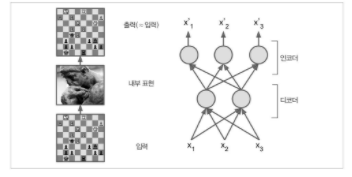

### 17.2 과소완전 선형 오토인코더로 PCA 수행하기

#### 주의점
* 오토인코더는 출력 개수와 입력의 개수가 동일함.
* 단순한 PCA를 수행하기 위해서는 활성화 함수를 사용하지 않음.(모든 뉴런이 선형)
* 비용 함수는 MSE.

In [28]:
from tensorflow import keras
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import tensorflow as tf

In [5]:
np.random.seed(4)  # seed 고정

# 3D 데이터셋 생성 
def generate_3d_data(m, w1=0.1, w2=0.3, noise=0.1):
    angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
    data = np.empty((m, 3))
    data[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
    data[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
    data[:, 2] = data[:, 0] * w1 + data[:, 1] * w2 + noise * np.random.randn(m)
    return data                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

X_train = generate_3d_data(60)
X_train = X_train - X_train.mean(axis=0, keepdims=0)

In [6]:
# 오토인코더 층 쌓음
encoder = keras.models.Sequential([keras.layers.Dense(2, input_shape=[3])])
decoder = keras.models.Sequential([keras.layers.Dense(3, input_shape=[2])])
autoencoder = keras.models.Sequential([encoder, decoder])

autoencoder.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1.5))

In [7]:
# 학습
history = autoencoder.fit(X_train, X_train, epochs=20)

Epoch 1/20
2/2 [==============================] - 0s 7ms/step - loss: 0.8334
Epoch 2/20
2/2 [==============================] - 0s 3ms/step - loss: 0.1768
Epoch 3/20
2/2 [==============================] - 0s 2ms/step - loss: 0.1604
Epoch 4/20
2/2 [==============================] - 0s 2ms/step - loss: 0.1135
Epoch 5/20
2/2 [==============================] - 0s 3ms/step - loss: 0.0665
Epoch 6/20
2/2 [==============================] - 0s 2ms/step - loss: 0.0568
Epoch 7/20
2/2 [==============================] - 0s 2ms/step - loss: 0.0330
Epoch 8/20
2/2 [==============================] - 0s 2ms/step - loss: 0.0242
Epoch 9/20
2/2 [==============================] - 0s 2ms/step - loss: 0.0164
Epoch 10/20
2/2 [==============================] - 0s 2ms/step - loss: 0.0118
Epoch 11/20
2/2 [==============================] - 0s 2ms/step - loss: 0.0096
Epoch 12/20
2/2 [==============================] - 0s 4ms/step - loss: 0.0085
Epoch 13/20
2/2 [==============================] - 0s 2ms/step - loss: 0.

In [8]:
# 지도학습이기 때문에 X_train이 입력이자 타겟이 됨.
codings = encoder.predict(X_train)  # 인코더 적용한 후 잠재 표현 확인 

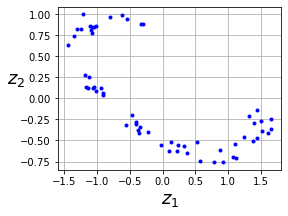

In [12]:
fig = plt.figure(figsize=(4,3))
plt.plot(codings[:,0], codings[:, 1], "b.")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)
# save_fig("linear_autoencoder_pca_plot")   # 따로 저장하지 않을 것이기 때문에 주석
plt.show()

# 3D 데이터셋이 오토인코더 적용 후 2D 데이터셋이 되었음. 

PCA처럼 데이터에 있는 분산이 가능한 많이 보존되도록 데이터를 투영할 최상의 2D 평명을 찾음.

### 17.3 적층 오토인코더
복잡한 코딩을 학습할 수 있도록 여러 개의 은닉층을 가지는 오토인코더

주의점
* 오토인코더가 너무 강력해지면 훈련 데이터를 완벽하게 재구성하겠지만 이 과정에서 유용한 데이터 표현을 학습하지 못하기 때문에 너무 강력해지지 않도록 구성하는 게 좋음. 

일반적으로 적층 오토인코더는 가운데 은닉층(코딩층)을 기준으로 대칭

In [14]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

In [15]:
def rounded_accuracy(y_true, y_pred):
    return keras.metrics.binary_accuracy(tf.round(y_true), tf.round(y_pred))

In [18]:
tf.random.set_seed(42)
np.random.seed(42)

## 인코더
stacked_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),  # 28x28 픽셀의 흑백 이미지 입력으로 받아 벡터로 표현하기 위해 펼침.
    keras.layers.Dense(100, activation="selu"),  # 100개 노드로 이루어진 Dense 층에 통과
    keras.layers.Dense(30, activation="selu"),   # 30개 노드로 이루어진 Dense 층에 통과
    
    # 네트워크가 아주 깊다면 르쿤 정규분포 초기화를 추가할 수도 있음. 
])
# 최종적으로 각 입력 이미지에 대해 인코더는 크기가 30인 벡터를 출력

## 디코더 
stacked_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[30]),  # 인코더가 출력한 크기가 30인 코딩을 입력으로 받음.
    keras.layers.Dense(28 * 28, activation="sigmoid"),      # 처음 입력과 동일한 크기를 가지도록 만듦.
    keras.layers.Reshape([28, 28])
])

stacked_ae = keras.models.Sequential([stacked_encoder, stacked_decoder])

# 적층 오토인코더는 PCA와 달리 MSE가 아닌 binary_crossentropy 사용.
# -> 더 빠르게 모델이 수렴하는 경향이 있음.
stacked_ae.compile(loss="binary_crossentropy",  
                   optimizer=keras.optimizers.SGD(lr=1.5), metrics=[rounded_accuracy])
history = stacked_ae.fit(X_train, X_train, epochs=20,
                         validation_data=(X_valid, X_valid))  # 검증셋으로 검증  

Epoch 1/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3814 - rounded_accuracy: 0.8487 - val_loss: 0.3173 - val_rounded_accuracy: 0.8989
Epoch 2/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3083 - rounded_accuracy: 0.9126 - val_loss: 0.3020 - val_rounded_accuracy: 0.9199
Epoch 3/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2998 - rounded_accuracy: 0.9203 - val_loss: 0.2986 - val_rounded_accuracy: 0.9197
Epoch 4/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2959 - rounded_accuracy: 0.9240 - val_loss: 0.2938 - val_rounded_accuracy: 0.9285
Epoch 5/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2928 - rounded_accuracy: 0.9268 - val_loss: 0.2919 - val_rounded_accuracy: 0.9284
Epoch 6/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2920 - rounded_accuracy: 0.9283 - val_loss: 0.2914 - val_rounded_accuracy: 0.9306
Epoch 7/20
1719/1719 [==================

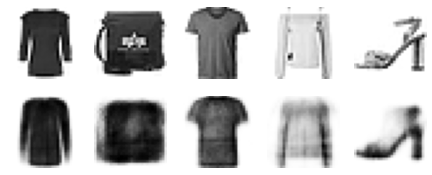

In [24]:
def plot_image(image):
    plt.imshow(image, cmap="binary")
    plt.axis("off")
    
def show_reconstructions(model, images=X_valid, n_images=5):
    reconstructions = model.predict(images[:n_images])
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plot_image(images[image_index])
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plot_image(reconstructions[image_index])
        
show_reconstructions(stacked_ae)
# save_fig("reconstruction_plot")

입력과 출력의 차이가 너무 크지 않아야함. 입력과 출력을 비교했을 때 정보 손실이 발생했고 이는 모델을 더 오래 훈련하거나 인코더와 디코더의 층을 늘리거나 코딩의 크기를 늘려야 할지도 모름.   

하지만, 네트워크가 너무 강력하면 어떤 유익한 패턴을 학습하지 못하고 완벽한 재구성 이미지를 만들것이다. 이 점을 주의해야함. 

#### 오토인코더 뒤에 t-SNE를 사용하여 차원 축소 시각화
훈련시킨 적층 신경망을 이용하여 차원축소에 적용할 수 있음. 

#### 장점
샘플과 특성이 많은 대용량 데이터셋을 다룰 수 있기 때문에 오토인코더를 사용해 적절한 수준으로 차원을 축소하고 다른 차원 축소 기법을 이용하여 시각화하는 것도 전략

In [25]:
np.random.seed(42)

from sklearn.manifold import TSNE

X_valid_compressed = stacked_encoder.predict(X_valid)
tsne = TSNE()
X_valid_2D = tsne.fit_transform(X_valid_compressed)   # t-SNE 시각화를 위해 차원을 2로 줄임
X_valid_2D = (X_valid_2D - X_valid_2D.min()) / (X_valid_2D.max() - X_valid_2D.min())

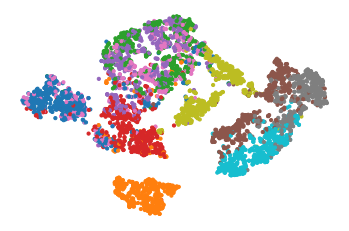

In [26]:
plt.scatter(X_valid_2D[:, 0], X_valid_2D[:, 1], c=y_valid, s=10, cmap="tab10")
plt.axis("off")
plt.show()

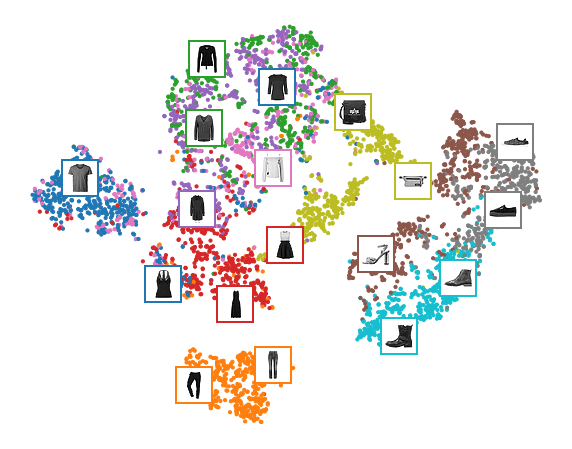

In [30]:
# adapted from https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html
plt.figure(figsize=(10, 8))
cmap = plt.cm.tab10
plt.scatter(X_valid_2D[:, 0], X_valid_2D[:, 1], c=y_valid, s=10, cmap=cmap)
image_positions = np.array([[1., 1.]])
for index, position in enumerate(X_valid_2D):
    dist = np.sum((position - image_positions) ** 2, axis=1)
    if np.min(dist) > 0.02: # if far enough from other images
        image_positions = np.r_[image_positions, [position]]
        imagebox = mpl.offsetbox.AnnotationBbox(
            mpl.offsetbox.OffsetImage(X_valid[index], cmap="binary"),
            position, bboxprops={"edgecolor": cmap(y_valid[index]), "lw": 2})
        plt.gca().add_artist(imagebox)
plt.axis("off")
# save_fig("fashion_mnist_visualization_plot")
plt.show()

#### 적층 오토인코더를 사용한 비지도 사전훈련

레이블된 훈련 데이터가 많지 않은 복잡한 지도 학습 문제를 다룰 때 비슷한 문제를 학습한 신경망을 찾아 하위층을 재사용  

✔ 저수준의 특성을 학습할 필요가 없어 적은 훈련 데이터를 사용해서 고성능 모델을 만들 수 있음.(즉, 기존의 네트워크에서 특성을 학습하는 기능을 재사용하는 것)

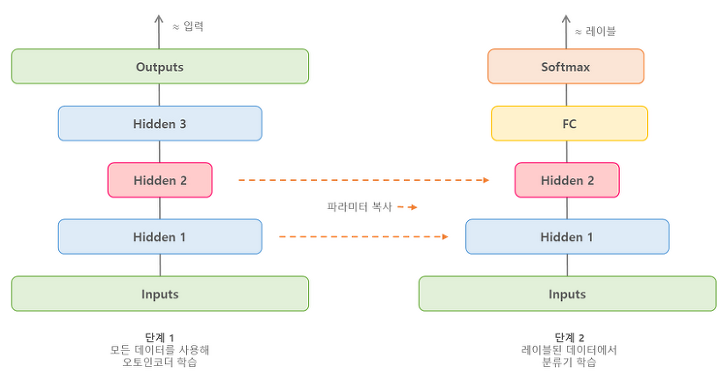

분류기를 훈련할 때 레이블된 훈련 데이터가 많지 않으면 사전훈련된 층을 적어도 가장 하위층 하나는 동결하는 것이 좋음.

✔ 가중치를 동결하면 모델에 있는 가중치의 수를 절반으로 줄여서 훈련 속도를 높이고 과대적합의 위험을 줄여줌.
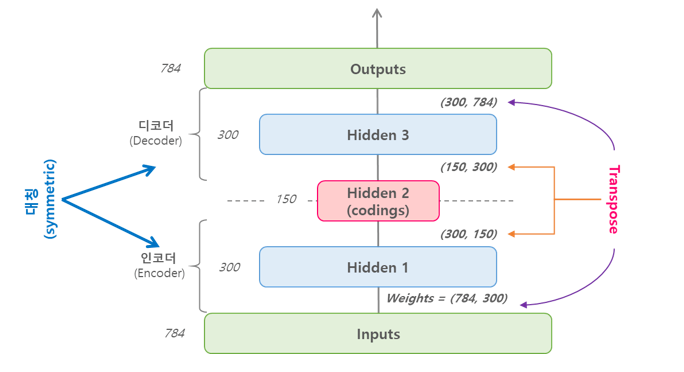

In [31]:
# 층 간 가중치를 묶는 class 생성 
class DenseTranspose(keras.layers.Layer):
    
    def __init__(self, dense, activation=None, **kwargs):
        self.dense = dense
        self.activation = keras.activations.get(activation)
        super().__init__(**kwargs)
    def build(self, batch_input_shape):
        self.biases = self.add_weight(name="bias",
                                      shape=[self.dense.input_shape[-1]],
                                      initializer="zeros")
        super().build(batch_input_shape)
    def call(self, inputs):
        # matmul 연산에서 동적으로 전치를 수행하므로 훨씬 효과적으로 가중치 사용 가능 
        z = tf.matmul(inputs, self.dense.weights[0], transpose_b=True)
        return self.activation(z + self.biases)  # 편향 벡터는 독자적으로 사용 가능 

In [32]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

dense_1 = keras.layers.Dense(100, activation="selu")
dense_2 = keras.layers.Dense(30, activation="selu")

tied_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    dense_1,
    dense_2
])

# decoder의 Dense 층이 인코더의 Dense 층과 묶여 있음. 
tied_decoder = keras.models.Sequential([
    DenseTranspose(dense_2, activation="selu"),
    DenseTranspose(dense_1, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

tied_ae = keras.models.Sequential([tied_encoder, tied_decoder])

tied_ae.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.SGD(lr=1.5), metrics=[rounded_accuracy])
history = tied_ae.fit(X_train, X_train, epochs=10,
                      validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3701 - rounded_accuracy: 0.8581 - val_loss: 0.3079 - val_rounded_accuracy: 0.9082
Epoch 2/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2998 - rounded_accuracy: 0.9202 - val_loss: 0.2952 - val_rounded_accuracy: 0.9284
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2928 - rounded_accuracy: 0.9266 - val_loss: 0.3023 - val_rounded_accuracy: 0.9077
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2898 - rounded_accuracy: 0.9293 - val_loss: 0.2880 - val_rounded_accuracy: 0.9332
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2869 - rounded_accuracy: 0.9321 - val_loss: 0.2873 - val_rounded_accuracy: 0.9316
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2866 - rounded_accuracy: 0.9333 - val_loss: 0.2861 - val_rounded_accuracy: 0.9354
Epoch 7/10
1719/1719 [==================

아까보다 낮은 재구성 오차

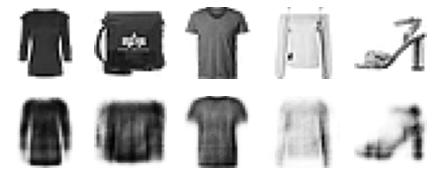

In [33]:
show_reconstructions(tied_ae)
plt.show()

#### 한 번에 오토인코더 한 개씩 훈련하기
전체 오토인코더를 훈련하지 않고 오토인코더 하나를 훈련하고 이를 쌓아올려서 한 개의 적층 오토인코더를 만들 수 있음.(탐욕적 방식의 층별 훈련으로 요즘엔 많이 사용하진 않지만 논문에 여전히 등장하고 있음.)
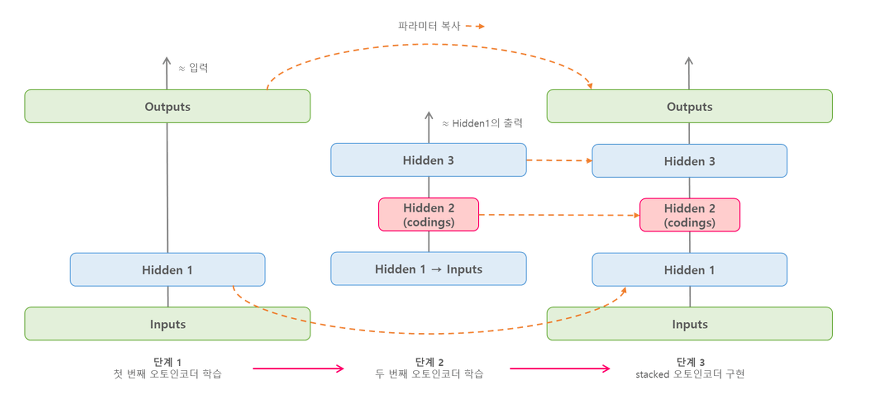

* 단계 1: 첫 번째 오토인코더는 입력을 재구성하도록 학습됨.
* 단계 2: 두 번째 오토인코더가 첫 번째 히든 레이어의 출력을 재구성하도록 학습됨.
* 단계 3: 단계 1~2의 오토인코더를 합쳐 최종적으로 하나의 적층 오토인코더 구현 

### 17.4 합성곱 오토인코더
이미지 데이터의 크기가 작지 않다면 오토인코더는 좋은 성능을 내지 못하기 때문에 비지도 사전훈련이나 차원 축소를 위해 이미지에 대한 오토인코더를 만들려면 합성곱 오토인코더를 생성해야함. 
* 인코더: 합성곱 층과 풀리 층으로 구성된 일반적인 CNN으로 높이와 너비(공간 방향의 차원)는 줄이고 특성 맵의 개수(깊이)를 늘려야함.
* 디코더: 이미지의 스케일을 늘리고 원본 차원으로 되돌려야함.

이를 위해서 전치 합성곱 층을 사용하거나 합성곱 층과 업샘플링 층을 연결.

In [35]:
tf.random.set_seed(42)
np.random.seed(42)

conv_encoder = keras.models.Sequential([
    keras.layers.Reshape([28, 28, 1], input_shape=[28, 28]),
    keras.layers.Conv2D(16, kernel_size=3, padding="SAME", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(32, kernel_size=3, padding="SAME", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(64, kernel_size=3, padding="SAME", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2)
])
conv_decoder = keras.models.Sequential([
    keras.layers.Conv2DTranspose(32, kernel_size=3, strides=2, padding="VALID", activation="selu",
                                 input_shape=[3, 3, 64]),
    keras.layers.Conv2DTranspose(16, kernel_size=3, strides=2, padding="SAME", activation="selu"),
    keras.layers.Conv2DTranspose(1, kernel_size=3, strides=2, padding="SAME", activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
conv_ae = keras.models.Sequential([conv_encoder, conv_decoder])

conv_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(lr=1.0),
                metrics=[rounded_accuracy])
history = conv_ae.fit(X_train, X_train, epochs=5,
                      validation_data=(X_valid, X_valid))

Epoch 1/5
1719/1719 [==============================] - 32s 18ms/step - loss: 0.3376 - rounded_accuracy: 0.8895 - val_loss: 0.2846 - val_rounded_accuracy: 0.9293
Epoch 2/5
1719/1719 [==============================] - 32s 19ms/step - loss: 0.2776 - rounded_accuracy: 0.9393 - val_loss: 0.2729 - val_rounded_accuracy: 0.9456
Epoch 3/5
1719/1719 [==============================] - 39s 23ms/step - loss: 0.2717 - rounded_accuracy: 0.9452 - val_loss: 0.2696 - val_rounded_accuracy: 0.9496
Epoch 4/5
1719/1719 [==============================] - 33s 19ms/step - loss: 0.2690 - rounded_accuracy: 0.9483 - val_loss: 0.2684 - val_rounded_accuracy: 0.9494
Epoch 5/5
1719/1719 [==============================] - 35s 21ms/step - loss: 0.2668 - rounded_accuracy: 0.9506 - val_loss: 0.2680 - val_rounded_accuracy: 0.9492


In [36]:
conv_encoder.summary()
conv_decoder.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)         

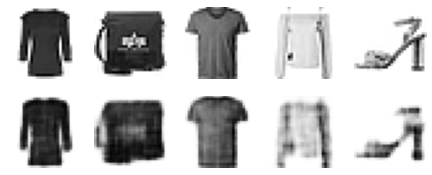

In [37]:
show_reconstructions(conv_ae)
plt.show()

### 17.5 순환 오토인코더
시계열이나 텍스트와 같은 시퀀스에 대해 비지도 학습이나 차원 축소를 할 때 사용하는 알고리즘. 
* 인코더: 일반적으로 입력 시퀀스를 하나의 벡터로 압축하는 sequence-to-vector RNN
* 디코더: vector-to-sequence RNN

In [39]:
# 타임 스텝마다 28차원을 갖는 어떤 길이의 시퀀스로 처리 가능하기 때문에 각 이미지를
# 행의 시퀀스로 간주하여 패션 MNIST 이미지 처리 

recurrent_encoder = keras.models.Sequential([
    keras.layers.LSTM(100, return_sequences=True, input_shape=[28, 28]),
    keras.layers.LSTM(30)
])

recurrent_decoder = keras.models.Sequential([
    # 타임 스텝마다 입력 벡터를 주입하기 위해 디코더의 첫 번째 층에 RepeatVector층 사용
    keras.layers.RepeatVector(28, input_shape=[30]), 
    keras.layers.LSTM(100, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(28, activation="sigmoid"))
])
recurrent_ae = keras.models.Sequential([recurrent_encoder, recurrent_decoder])
recurrent_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(0.1),
                     metrics=[rounded_accuracy])

In [40]:
history = recurrent_ae.fit(X_train, X_train, epochs=10, validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 [==============================] - 68s 36ms/step - loss: 0.5628 - rounded_accuracy: 0.7075 - val_loss: 0.4581 - val_rounded_accuracy: 0.8081
Epoch 2/10
1719/1719 [==============================] - 66s 38ms/step - loss: 0.4278 - rounded_accuracy: 0.8285 - val_loss: 0.3742 - val_rounded_accuracy: 0.8680
Epoch 3/10
1719/1719 [==============================] - 64s 37ms/step - loss: 0.3698 - rounded_accuracy: 0.8677 - val_loss: 0.3601 - val_rounded_accuracy: 0.8769
Epoch 4/10
1719/1719 [==============================] - 63s 37ms/step - loss: 0.3541 - rounded_accuracy: 0.8788 - val_loss: 0.3523 - val_rounded_accuracy: 0.8773
Epoch 5/10
1719/1719 [==============================] - 65s 38ms/step - loss: 0.3422 - rounded_accuracy: 0.8865 - val_loss: 0.3362 - val_rounded_accuracy: 0.8925
Epoch 6/10
1719/1719 [==============================] - 66s 38ms/step - loss: 0.3357 - rounded_accuracy: 0.8911 - val_loss: 0.3307 - val_rounded_accuracy: 0.8959
Epoch 7/10
1719/1719 [======

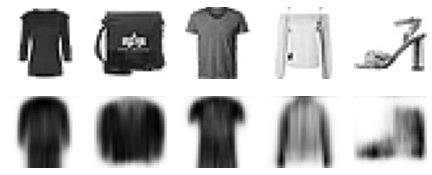

In [41]:
show_reconstructions(recurrent_ae)
plt.show()

▶ 지금까지 흥미로운 특성을 학습하도록 강제하기 위해 코딩 츠으이 크기를 제한하여 과소 완전으로 만들었음.   
▶ 입력 크기만큼 또는 입력보다 큰 코딩 층을 두어 과대완전 오토인코더도 만들 수 있음. (잡음 제거 오토인코더, 희소 오토인코더, 변이형 오토인코더)

### 17.6 잡음 제거 오토인코더
유용한 특성을 학습하도록 입력에 잡음(가우시안 잡음 or 무작위 드롭아웃)을 추가하고 잡음이 없는 원본 입력을 복원하도록 훈련하는 알고리즘
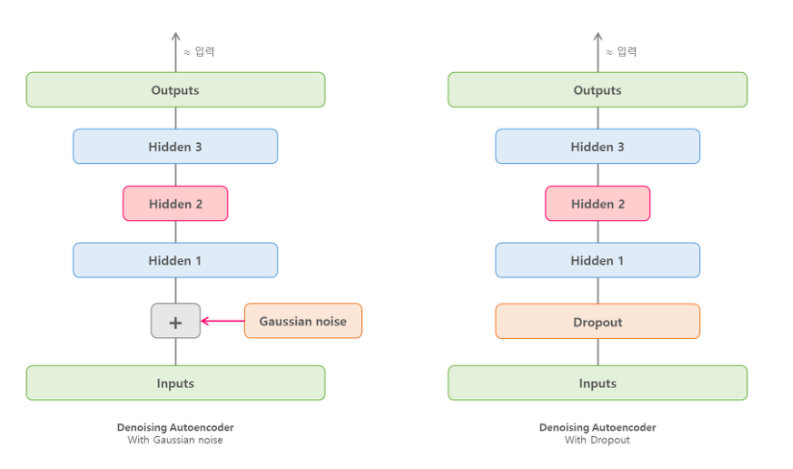

In [43]:
tf.random.set_seed(42)
np.random.seed(42)

denoising_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.GaussianNoise(0.2),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(30, activation="selu")
])
denoising_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[30]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
denoising_ae = keras.models.Sequential([denoising_encoder, denoising_decoder])
denoising_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(lr=1.0),
                     metrics=[rounded_accuracy])
history = denoising_ae.fit(X_train, X_train, epochs=10,
                           validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.4007 - rounded_accuracy: 0.8323 - val_loss: 0.3182 - val_rounded_accuracy: 0.9036
Epoch 2/10
1719/1719 [==============================] - 13s 7ms/step - loss: 0.3146 - rounded_accuracy: 0.9075 - val_loss: 0.3087 - val_rounded_accuracy: 0.9156
Epoch 3/10
1719/1719 [==============================] - 16s 9ms/step - loss: 0.3067 - rounded_accuracy: 0.9141 - val_loss: 0.3035 - val_rounded_accuracy: 0.9191
Epoch 4/10
1719/1719 [==============================] - 17s 10ms/step - loss: 0.3032 - rounded_accuracy: 0.9173 - val_loss: 0.2999 - val_rounded_accuracy: 0.9207
Epoch 5/10
1719/1719 [==============================] - 16s 9ms/step - loss: 0.2998 - rounded_accuracy: 0.9205 - val_loss: 0.2968 - val_rounded_accuracy: 0.9252
Epoch 6/10
1719/1719 [==============================] - 16s 9ms/step - loss: 0.2985 - rounded_accuracy: 0.9222 - val_loss: 0.2947 - val_rounded_accuracy: 0.9272
Epoch 7/10
1719/1719 [===========

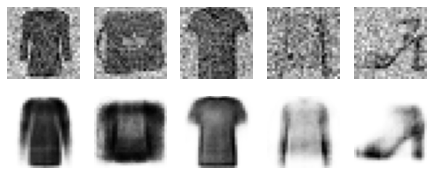

In [44]:
tf.random.set_seed(42)
np.random.seed(42)

noise = keras.layers.GaussianNoise(0.2)
show_reconstructions(denoising_ae, noise(X_valid, training=True))
plt.show()

In [45]:
tf.random.set_seed(42)
np.random.seed(42)

dropout_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(30, activation="selu")
])
dropout_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[30]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
dropout_ae = keras.models.Sequential([dropout_encoder, dropout_decoder])
dropout_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(lr=1.0),
                   metrics=[rounded_accuracy])
history = dropout_ae.fit(X_train, X_train, epochs=10,
                         validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 [==============================] - 13s 7ms/step - loss: 0.4073 - rounded_accuracy: 0.8261 - val_loss: 0.3200 - val_rounded_accuracy: 0.9041
Epoch 2/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3203 - rounded_accuracy: 0.9017 - val_loss: 0.3125 - val_rounded_accuracy: 0.9110
Epoch 3/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.3136 - rounded_accuracy: 0.9067 - val_loss: 0.3075 - val_rounded_accuracy: 0.9153
Epoch 4/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.3102 - rounded_accuracy: 0.9094 - val_loss: 0.3041 - val_rounded_accuracy: 0.9178
Epoch 5/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.3070 - rounded_accuracy: 0.9121 - val_loss: 0.3015 - val_rounded_accuracy: 0.9193
Epoch 6/10
1719/1719 [==============================] - 15s 9ms/step - loss: 0.3063 - rounded_accuracy: 0.9132 - val_loss: 0.3014 - val_rounded_accuracy: 0.9173
Epoch 7/10
1719/1719 [============

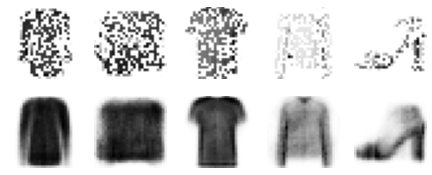

In [47]:
tf.random.set_seed(42)
np.random.seed(42)

dropout = keras.layers.Dropout(0.5)
show_reconstructions(dropout_ae, dropout(X_valid, training=True))
# save_fig("dropout_denoising_plot", tight_layout=False)

### 17.7 희소 오토인코더
비용 함수에 적절한 항을 추가하여 오토인코더가 코딩 층에서 활성화되는 뉴런 수를 감소시키도록 만드는 제약 방식을 사용한 오토인코더

In [54]:
tf.random.set_seed(42)
np.random.seed(42)

sparse_l1_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(300, activation="sigmoid"), # 코딩 층에 sigmoid 활성화 함수를 상요하고 큰 코딩 층 사용
    
    # 훈련하는 동안에만 작동 
    keras.layers.ActivityRegularization(l1=1e-3)  # 코딩 층의 활성화 값에 l1 규제 추가
])

# 디코더는 일반적인 디코더 
sparse_l1_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[300]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

sparse_l1_ae = keras.models.Sequential([sparse_l1_encoder, sparse_l1_decoder])
sparse_l1_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(lr=1.0),
                     metrics=[rounded_accuracy])

history = sparse_l1_ae.fit(X_train, X_train, epochs=10,
                           validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 [==============================] - 15s 8ms/step - loss: 0.4971 - rounded_accuracy: 0.7657 - val_loss: 0.3808 - val_rounded_accuracy: 0.8555
Epoch 2/10
1719/1719 [==============================] - 13s 7ms/step - loss: 0.3733 - rounded_accuracy: 0.8649 - val_loss: 0.3638 - val_rounded_accuracy: 0.8741
Epoch 3/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3578 - rounded_accuracy: 0.8773 - val_loss: 0.3502 - val_rounded_accuracy: 0.8857
Epoch 4/10
1719/1719 [==============================] - 13s 7ms/step - loss: 0.3460 - rounded_accuracy: 0.8860 - val_loss: 0.3418 - val_rounded_accuracy: 0.8898
Epoch 5/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3383 - rounded_accuracy: 0.8914 - val_loss: 0.3368 - val_rounded_accuracy: 0.8949
Epoch 6/10
1719/1719 [==============================] - 11s 7ms/step - loss: 0.3342 - rounded_accuracy: 0.8953 - val_loss: 0.3316 - val_rounded_accuracy: 0.8992
Epoch 7/10
1719/1719 [============

규제는 신경망이 0에 가까운 코딩을 만들도록 유도하지만 입력을 올바르게 재구성하지 못하면 벌칙을 받기 때문에 적어도 0이 아닌 값이 조금은 출력되어야함.   
l2 norm 대신 l1 norm 을 이용하는 이유는 신경망이 입력 이미지에서 불필요한 것은 제거하고 가장 중요한 코딩을 보전하도록 만들기 위해서임. 

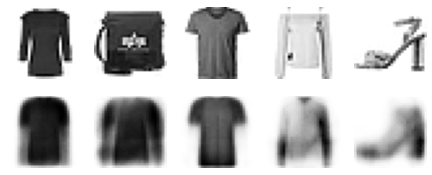

In [55]:
show_reconstructions(sparse_l1_ae)

희소 손실을 구하는 간단한 방법으로는 제곱 오차를 추가하는 방법이 있지만 희소 오토인코더에서는 아래의 그래프처럼 MSE보다 더 경사가 급한 쿨백 라이블러 발산을 사용하는 것이 좋은 방법.

(0.0, 1.0, 0.0, 0.95)

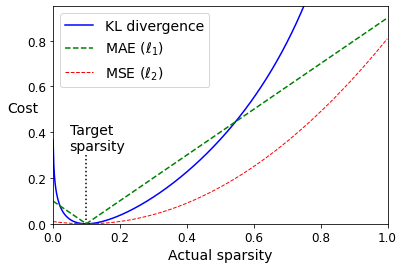

In [56]:
p = 0.1
q = np.linspace(0.001, 0.999, 500)
kl_div = p * np.log(p / q) + (1 - p) * np.log((1 - p) / (1 - q))
mse = (p - q)**2
mae = np.abs(p - q)
plt.plot([p, p], [0, 0.3], "k:")
plt.text(0.05, 0.32, "Target\nsparsity", fontsize=14)
plt.plot(q, kl_div, "b-", label="KL divergence")
plt.plot(q, mae, "g--", label=r"MAE ($\ell_1$)")
plt.plot(q, mse, "r--", linewidth=1, label=r"MSE ($\ell_2$)")
plt.legend(loc="upper left", fontsize=14)
plt.xlabel("Actual sparsity")
plt.ylabel("Cost", rotation=0)
plt.axis([0, 1, 0, 0.95])
# save_fig("sparsity_loss_plot")

쿨백 라이블러 발산은 두 확률분포의 차이를 계산하는 데 사용하는 함수   

희소 오토인코더에서는 코딩층에서 뉴런이 활성화될 목표 확률 p와 실제확률 q(학습 배치에 대한 평균 활성화) 사이의 발산을 측정하며, 식은 아래와 같음.

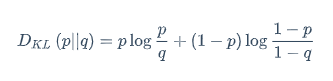

In [57]:
K = keras.backend
kl_divergence = keras.losses.kullback_leibler_divergence

class KLDivergenceRegularizer(keras.regularizers.Regularizer):
    def __init__(self, weight, target=0.1):
        self.weight = weight
        self.target = target
    def __call__(self, inputs):
        mean_activities = K.mean(inputs, axis=0)
        return self.weight * (
            kl_divergence(self.target, mean_activities) +
            kl_divergence(1. - self.target, 1. - mean_activities))

In [58]:
tf.random.set_seed(42)
np.random.seed(42)

kld_reg = KLDivergenceRegularizer(weight=0.05, target=0.1)
sparse_kl_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(300, activation="sigmoid", activity_regularizer=kld_reg)
])
sparse_kl_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[300]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
sparse_kl_ae = keras.models.Sequential([sparse_kl_encoder, sparse_kl_decoder])
sparse_kl_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(lr=1.0),
              metrics=[rounded_accuracy])
history = sparse_kl_ae.fit(X_train, X_train, epochs=10,
                           validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 [==============================] - 15s 8ms/step - loss: 0.4753 - rounded_accuracy: 0.7629 - val_loss: 0.3716 - val_rounded_accuracy: 0.8564
Epoch 2/10
1719/1719 [==============================] - 13s 8ms/step - loss: 0.3606 - rounded_accuracy: 0.8686 - val_loss: 0.3442 - val_rounded_accuracy: 0.8847
Epoch 3/10
1719/1719 [==============================] - 13s 8ms/step - loss: 0.3374 - rounded_accuracy: 0.8887 - val_loss: 0.3293 - val_rounded_accuracy: 0.8975
Epoch 4/10
1719/1719 [==============================] - 15s 9ms/step - loss: 0.3247 - rounded_accuracy: 0.9000 - val_loss: 0.3213 - val_rounded_accuracy: 0.9043
Epoch 5/10
1719/1719 [==============================] - 17s 10ms/step - loss: 0.3178 - rounded_accuracy: 0.9057 - val_loss: 0.3171 - val_rounded_accuracy: 0.9078
Epoch 6/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.3153 - rounded_accuracy: 0.9083 - val_loss: 0.3140 - val_rounded_accuracy: 0.9105
Epoch 7/10
1719/1719 [===========

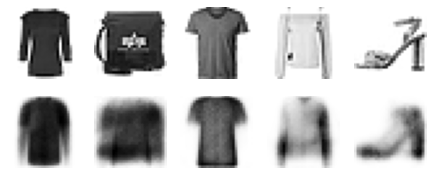

In [59]:
show_reconstructions(sparse_kl_ae)

In [64]:
def plot_percent_hist(ax, data, bins):
    counts, _ = np.histogram(data, bins=bins)
    widths = bins[1:] - bins[:-1]
    x = bins[:-1] + widths / 2
    ax.bar(x, counts / len(data), width=widths*0.8)
    ax.xaxis.set_ticks(bins)
    ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(
        lambda y, position: "{}%".format(int(np.round(100 * y)))))
    ax.grid(True)

def plot_activations_histogram(encoder, height=1, n_bins=10):
    X_valid_codings = encoder(X_valid).numpy()
    activation_means = X_valid_codings.mean(axis=0)
    mean = activation_means.mean()
    bins = np.linspace(0, 1, n_bins + 1)

    fig, [ax1, ax2] = plt.subplots(figsize=(10, 3), nrows=1, ncols=2, sharey=True)
    plot_percent_hist(ax1, X_valid_codings.ravel(), bins)
    ax1.plot([mean, mean], [0, height], "k--", label="Overall Mean = {:.2f}".format(mean))
    ax1.legend(loc="upper center", fontsize=14)
    ax1.set_xlabel("Activation")
    ax1.set_ylabel("% Activations")
    ax1.axis([0, 1, 0, height])
    plot_percent_hist(ax2, activation_means, bins)
    ax2.plot([mean, mean], [0, height], "k--")
    ax2.set_xlabel("Neuron Mean Activation")
    ax2.set_ylabel("% Neurons")
    ax2.axis([0, 1, 0, height])

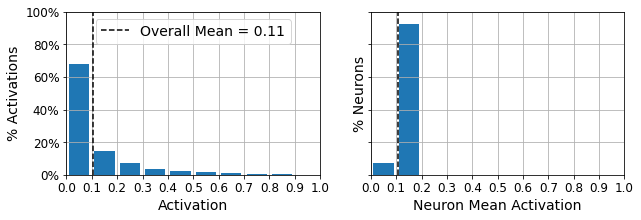

In [65]:
plot_activations_histogram(sparse_kl_encoder)
# save_fig("sparse_autoencoder_plot")
plt.show()

### 17.8 변이형 오토인코더

In [66]:
class Sampling(keras.layers.Layer):
    def call(self, inputs):
        mean, log_var = inputs
        return K.random_normal(tf.shape(log_var)) * K.exp(log_var / 2) + mean 

In [67]:
tf.random.set_seed(42)
np.random.seed(42)

codings_size = 10

inputs = keras.layers.Input(shape=[28, 28])
z = keras.layers.Flatten()(inputs)
z = keras.layers.Dense(150, activation="selu")(z)
z = keras.layers.Dense(100, activation="selu")(z)
codings_mean = keras.layers.Dense(codings_size)(z)
codings_log_var = keras.layers.Dense(codings_size)(z)
codings = Sampling()([codings_mean, codings_log_var])
variational_encoder = keras.models.Model(
    inputs=[inputs], outputs=[codings_mean, codings_log_var, codings])

decoder_inputs = keras.layers.Input(shape=[codings_size])
x = keras.layers.Dense(100, activation="selu")(decoder_inputs)
x = keras.layers.Dense(150, activation="selu")(x)
x = keras.layers.Dense(28 * 28, activation="sigmoid")(x)
outputs = keras.layers.Reshape([28, 28])(x)
variational_decoder = keras.models.Model(inputs=[decoder_inputs], outputs=[outputs])

_, _, codings = variational_encoder(inputs)
reconstructions = variational_decoder(codings)
variational_ae = keras.models.Model(inputs=[inputs], outputs=[reconstructions])

latent_loss = -0.5 * K.sum(
    1 + codings_log_var - K.exp(codings_log_var) - K.square(codings_mean),
    axis=-1)
variational_ae.add_loss(K.mean(latent_loss) / 784.)
variational_ae.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=[rounded_accuracy])
history = variational_ae.fit(X_train, X_train, epochs=25, batch_size=128,
                             validation_data=(X_valid, X_valid))

Epoch 1/25
430/430 [==============================] - 10s 16ms/step - loss: 0.4439 - rounded_accuracy: 0.8156 - val_loss: 0.3541 - val_rounded_accuracy: 0.8924
Epoch 2/25
430/430 [==============================] - 6s 14ms/step - loss: 0.3465 - rounded_accuracy: 0.8946 - val_loss: 0.3411 - val_rounded_accuracy: 0.9030
Epoch 3/25
430/430 [==============================] - 6s 15ms/step - loss: 0.3343 - rounded_accuracy: 0.9037 - val_loss: 0.3351 - val_rounded_accuracy: 0.9060
Epoch 4/25
430/430 [==============================] - 6s 14ms/step - loss: 0.3289 - rounded_accuracy: 0.9082 - val_loss: 0.3289 - val_rounded_accuracy: 0.9111
Epoch 5/25
430/430 [==============================] - 6s 14ms/step - loss: 0.3253 - rounded_accuracy: 0.9117 - val_loss: 0.3264 - val_rounded_accuracy: 0.9149
Epoch 6/25
430/430 [==============================] - 6s 14ms/step - loss: 0.3241 - rounded_accuracy: 0.9131 - val_loss: 0.3248 - val_rounded_accuracy: 0.9149
Epoch 7/25
430/430 [=========================

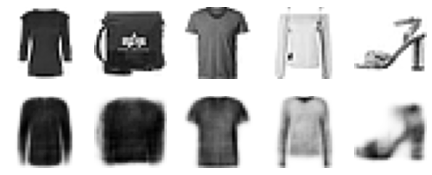

In [68]:
show_reconstructions(variational_ae)
plt.show()